# Geohackweek participant selection

In [1]:
%matplotlib inline
import os
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import entrofy
import entrofy.mappers
import entrofy.core

import six

seed = 20170615

In [2]:
# Get credentials
scope = ['https://spreadsheets.google.com/feeds']

credentials = ServiceAccountCredentials.from_json_keyfile_name(os.path.join('..', 'Geohackweek2017-adf8548865eb.json'), scope)

gc = gspread.authorize(credentials)

In [3]:
# See available sheets
gc.openall()

[<Spreadsheet 'Event Registration (Responses)' id:1mh5I8oIlVCtNB80nIcuwvTJsichHpaB2D_Os-iuCCEo>]

In [4]:
sheets = gc.open_by_key('1mh5I8oIlVCtNB80nIcuwvTJsichHpaB2D_Os-iuCCEo')

In [5]:
ws = sheets.get_worksheet(0)

In [6]:
rec = ws.get_all_records()

In [7]:
df = pd.DataFrame.from_records(rec)

In [8]:
len(df)

83

In [9]:
df.columns

Index(['Do you have any specific project you intend to bring to Geo Hackweek?',
       'Do you have any specific topics you would like to learn about at Geo Hackweek?',
       'Do you have specific datasets that you would like to share at Geo Hackweek to work on with other groups? ',
       'Email Address', 'Experience with geospatial datasets',
       'Familiarity with command line interfaces', 'First Name',
       'Have you applied to Geo Hackweek before and not been selected for participation?',
       'Have you attended any hack day or hack week before?',
       'In terms of gender identity, do you consider yourself a minority with respect to the field of geospatial science?',
       'In terms of racial or ethnic identity, do you consider yourself a minority with respect to the field of geospatial science?',
       'Institution or Organization',
       'Is there a topic you could imagine teaching at Geo Hackweek?',
       'Last Name', 'Programming experience',
       'The main reas

In [10]:
new_cols = ['specific_project', 
            'specific_topics', 
            'specific_datasets', 
            'email', 
            'exp_geospatial', 
            'exp_cmd', 
            'first_name', 
            'apply_geohack',
            'apply_hack', 
            'gender_minor', 
            'ethnic_minor',
            'org_institute',
            'teach_topic',
            'last_name',
            'exp_prog',
            'reason_attend',
            'timestamp',
            'person_url',
            'location',
            'position',
            'science_work',
            'need_financial']

In [11]:
df.columns = new_cols

In [12]:
df = df.drop(['email', 'person_url', 'org_institute', 'first_name', 'last_name', 'reason_attend'], 
        axis=1)

In [13]:
df.replace('', 'na', regex=True, inplace=True)

In [14]:
df.head()

,specific_project,specific_topics,specific_datasets,exp_geospatial,exp_cmd,apply_geohack,apply_hack,gender_minor,ethnic_minor,teach_topic,exp_prog,timestamp,location,position,science_work,need_financial
0,No,What tools are out there for my data.,No,I have extensive experience with geospatial data,I commonly use a command line in my work,No,Yes,No,Yes,Conda and Docker!,Release code for others to use,5/11/2017 9:49:24,North America,Research Staff,oceanography,No support required.
1,use Sentinel-2 to visualize algal blooms. I w...,I'd really like to learn a bit about user inte...,I most often use Landsat and Sentinel 2 datasets.,I have extensive experience with geospatial data,I occasionally use a command line in my work,No,No,Yes,No,I use Sentinel-2 to visualize algal blooms. I'...,Program a little for coursework or research,5/14/2017 12:38:18,North America,Graduate/postgraduate student,water resources,I absolutely need support to attend.
2,Spatial stream network models and associated d...,"Python coding, batch scripting, automated data...",na,I have extensive experience with geospatial data,I occasionally use a command line in my work,No,No,No,No,na,Program a little for coursework or research,5/14/2017 14:16:53,North America,Graduate/postgraduate student,water resources,No support required.
3,na,Modeling for surface process and natural event...,"LiDAR, IfSAR",I have extensive experience with geospatial data,I occasionally use a command line in my work,No,No,Yes,No,Image interpretation,Program a little for coursework or research,5/15/2017 0:18:39,Asia,Graduate/postgraduate student,earth surface processes,I absolutely need support to attend.
4,No - but this may change after this summer fie...,"github / python interface, GEE processing wit...","maybe - I have worldview data, time series che...",I have extensive experience with geospatial data,I occasionally use a command line in my work,No,No,No,No,Using the NHDPlus database for freshwater science,Program a little for coursework or research,5/15/2017 9:19:50,North America,Teaching Faculty,water resources,No support required.


In [15]:
fixed_categories = ['location', 
                    'position', 
                    'science_work', 
                    'exp_prog', 
                    'exp_geospatial', 
                    'exp_cmd', 
                    'apply_hack', 
                    'apply_geohack', 
                    'need_financial', 
                    'gender_minor', 
                    'ethnic_minor']

In [16]:
def make_plot(column_str):
    ax = entrofy.plotting.plot_distribution(df, column_str,
                                        xtype="categorical",
                                        cmap="YlGnBu", ax=None)
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation='vertical')

### What is your current geographical location?

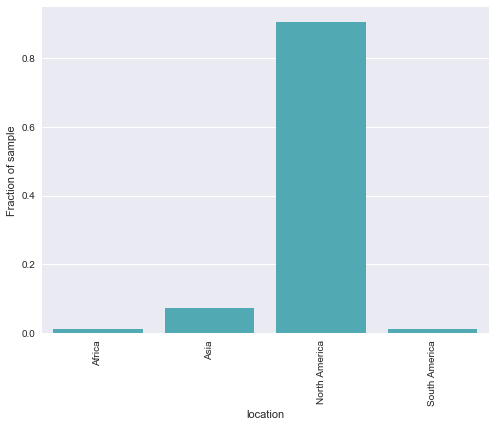

In [17]:
make_plot(fixed_categories[0])

### What is your current position?

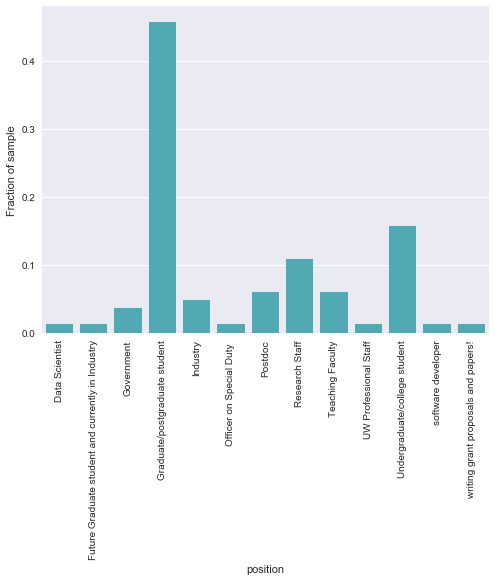

In [18]:
make_plot(fixed_categories[1])

### What is your primary science/work focus?

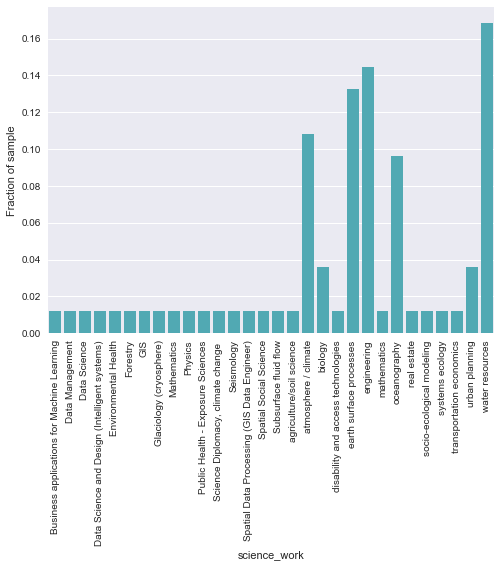

In [19]:
make_plot(fixed_categories[2])

### Programming experience

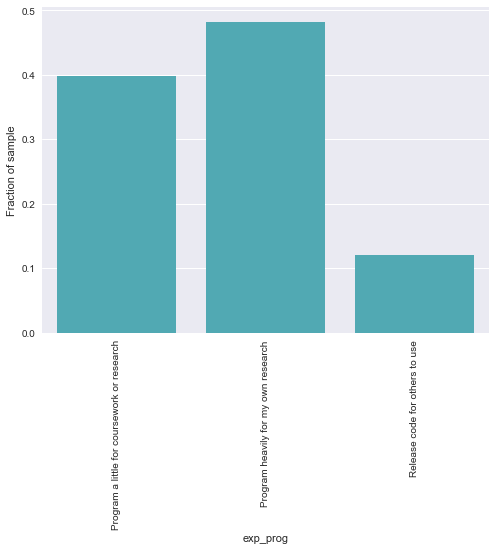

In [20]:
make_plot(fixed_categories[3])

### In terms of racial or ethnic identity, do you consider yourself a minority with respect to the field of geospatial science?

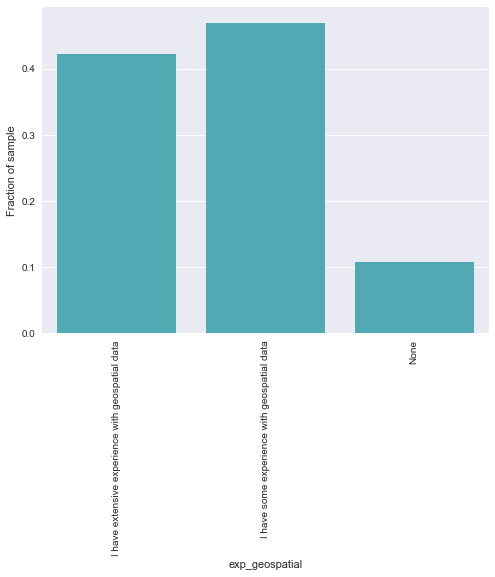

In [21]:
make_plot(fixed_categories[4])

### Familiarity with command line interfaces

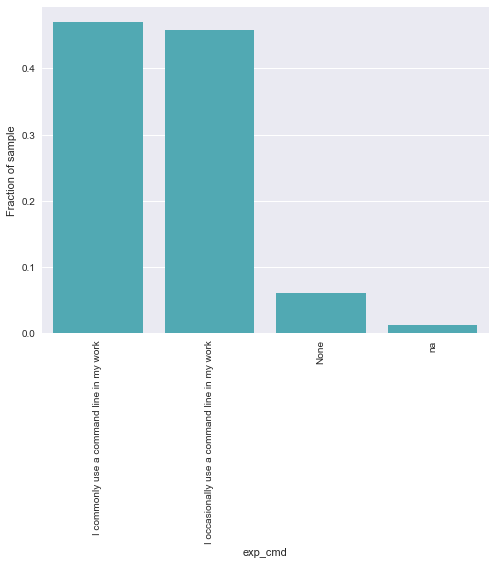

In [22]:
make_plot(fixed_categories[5])

### Have you attended any hack day or hack week before?

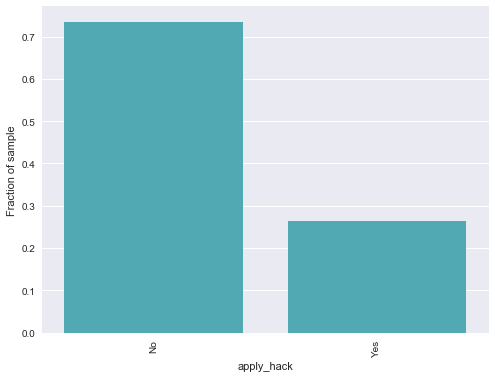

In [23]:
make_plot(fixed_categories[6])

### Have you applied to Geo Hackweek before and not been selected for participation?

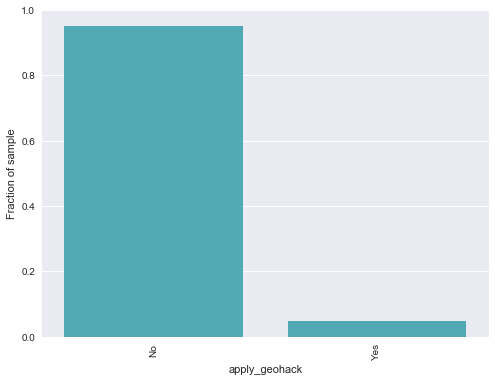

In [24]:
make_plot(fixed_categories[7])

### Will you be likely to need financial support from us to attend Geo Hackweek?

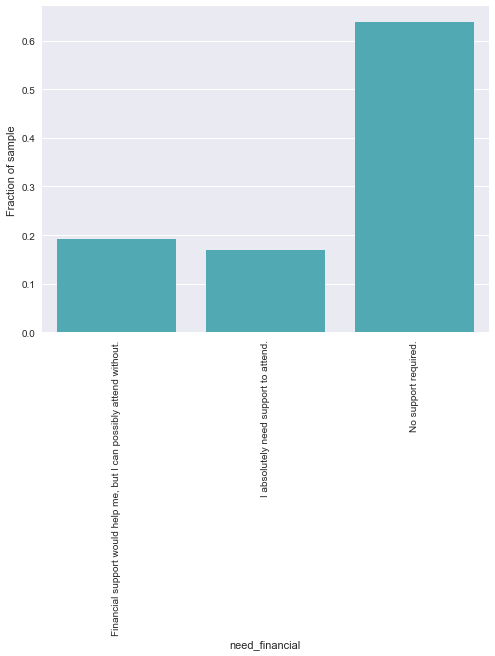

In [25]:
make_plot(fixed_categories[8])

### In terms of gender identity, do you consider yourself a minority with respect to the field of geospatial science?

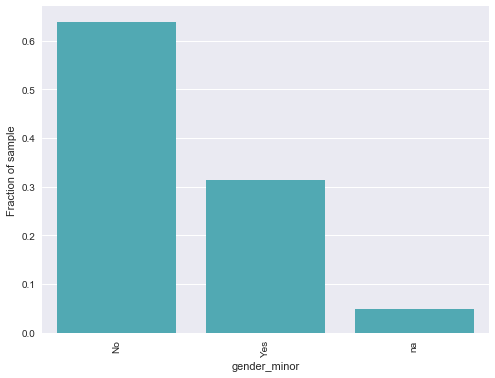

In [26]:
make_plot(fixed_categories[9])

### In terms of racial or ethnic identity, do you consider yourself a minority with respect to the field of geospatial science?

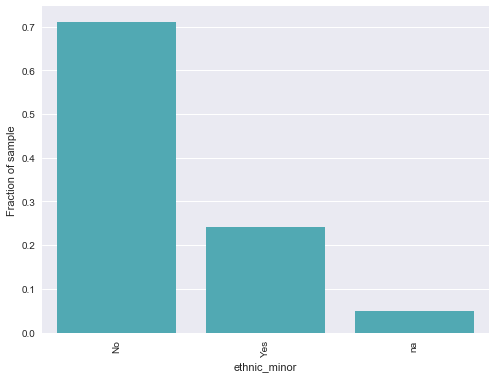

In [27]:
make_plot(fixed_categories[10])

In [28]:
weights = {'position': 1.0, 
           'exp_geospatial': 1.0, 
           'science_work': 1.0}

In [29]:
mappers = entrofy.core.construct_mappers(df, weights)

In [30]:
mappers

{'exp_geospatial': <entrofy.mappers.ObjectMapper at 0x11d585ef0>,
 'position': <entrofy.mappers.ObjectMapper at 0x11d6a6080>,
 'science_work': <entrofy.mappers.ObjectMapper at 0x11d585da0>}

In [31]:
datatypes = {'position': 'categorical',
             'exp_geospatial': 'categorical', 
             'science_work': 'categorical'}

In [32]:
mappers = entrofy.core.construct_mappers(df, weights, datatypes)

In [33]:
mappers['position'].targets

{'Data Scientist': 0.07692307692307693,
 'Future Graduate student and currently in Industry': 0.07692307692307693,
 'Government': 0.07692307692307693,
 'Graduate/postgraduate student': 0.07692307692307693,
 'Industry': 0.07692307692307693,
 'Officer on Special Duty ': 0.07692307692307693,
 'Postdoc': 0.07692307692307693,
 'Research Staff': 0.07692307692307693,
 'Teaching Faculty': 0.07692307692307693,
 'UW Professional Staff': 0.07692307692307693,
 'Undergraduate/college student': 0.07692307692307693,
 'software developer': 0.07692307692307693,
 'writing grant proposals and papers!': 0.07692307692307693}

In [34]:
mappers['exp_geospatial'].targets

{'I have extensive experience with geospatial data': 0.3333333333333333,
 'I have some experience with geospatial data': 0.3333333333333333,
 'None': 0.3333333333333333}

In [35]:
mappers['science_work'].targets

{'Business applications for Machine Learning': 0.03333333333333333,
 'Data Management': 0.03333333333333333,
 'Data Science': 0.03333333333333333,
 'Data Science and Design (Intelligent systems)': 0.03333333333333333,
 'Environmental Health': 0.03333333333333333,
 'Forestry': 0.03333333333333333,
 'GIS': 0.03333333333333333,
 'Glaciology (cryosphere)': 0.03333333333333333,
 'Mathematics': 0.03333333333333333,
 'Physics': 0.03333333333333333,
 'Public Health - Exposure Sciences': 0.03333333333333333,
 'Science Diplomacy, climate change ': 0.03333333333333333,
 'Seismology': 0.03333333333333333,
 'Spatial Data Processing (GIS Data Engineer)': 0.03333333333333333,
 'Spatial Social Science': 0.03333333333333333,
 'Subsurface fluid flow': 0.03333333333333333,
 'agriculture/soil science': 0.03333333333333333,
 'atmosphere / climate': 0.03333333333333333,
 'biology': 0.03333333333333333,
 'disability and access technologies': 0.03333333333333333,
 'earth surface processes': 0.0333333333333333

In [36]:
# # new targets in alphabetical order
# new_targets = [0.2, 0.5, 0.2, 0.1]

# # sort keys for the targets dictionary alphabetically:
# sorted_keys = np.sort(mappers["subfield"].targets.keys())

# for t, key in zip(new_targets, sorted_keys):
#     mappers["subfield"].targets[key] = t

In [37]:
idx, max_score = entrofy.core.entrofy(df, 20,
                                      mappers=mappers,
                                      weights=weights,
                                      seed=seed)
print(max_score)

41.7767839964


In [38]:
df.loc[idx]

,specific_project,specific_topics,specific_datasets,exp_geospatial,exp_cmd,apply_geohack,apply_hack,gender_minor,ethnic_minor,teach_topic,exp_prog,timestamp,location,position,science_work,need_financial
0,No,What tools are out there for my data.,No,I have extensive experience with geospatial data,I commonly use a command line in my work,No,Yes,No,Yes,Conda and Docker!,Release code for others to use,5/11/2017 9:49:24,North America,Research Staff,oceanography,No support required.
5,"Likely will in the fall, nothing right now.",Machine Learning for Image/Grided Data Classif...,Not at the moment,I have extensive experience with geospatial data,I commonly use a command line in my work,No,Yes,No,No,No,Program a little for coursework or research,5/15/2017 14:37:15,North America,Research Staff,Spatial Social Science,No support required.
9,na,na,na,None,I commonly use a command line in my work,No,No,No,No,na,Program heavily for my own research,5/22/2017 10:09:44,North America,Graduate/postgraduate student,Seismology,No support required.
10,na,New Python methods,na,I have extensive experience with geospatial data,I commonly use a command line in my work,No,No,No,No,na,Program heavily for my own research,5/22/2017 10:28:51,North America,Postdoc,Glaciology (cryosphere),No support required.
13,https://www.kaggle.com/c/planet-understanding-...,Machine Learning applications for general infe...,https://www.kaggle.com/c/planet-understanding-...,I have some experience with geospatial data,I occasionally use a command line in my work,No,Yes,No,No,na,Program a little for coursework or research,5/22/2017 12:07:10,North America,Undergraduate/college student,Business applications for Machine Learning,"Financial support would help me, but I can pos..."
14,None right now.,"Python for time-series analysis, Google Earth ...",Potentially yes.,I have some experience with geospatial data,I occasionally use a command line in my work,No,No,Yes,Yes,I have used R for my research. I could probabl...,Program heavily for my own research,5/22/2017 12:22:30,North America,Teaching Faculty,water resources,I absolutely need support to attend.
20,na,How to derive insights from geospatial datasets,na,I have some experience with geospatial data,I commonly use a command line in my work,No,Yes,na,na,Actionable Text Analytics from Customer Feedback,Release code for others to use,5/22/2017 18:45:50,North America,Industry,Data Science,No support required.
23,na,na,na,None,None,No,No,na,na,na,Program a little for coursework or research,5/22/2017 23:09:13,North America,Undergraduate/college student,Physics,"Financial support would help me, but I can pos..."
28,na,I would like to learn more about coding and ge...,I do not.,None,None,No,No,No,Yes,na,Program a little for coursework or research,5/23/2017 12:54:44,North America,Undergraduate/college student,Mathematics,I absolutely need support to attend.
29,na,na,na,I have some experience with geospatial data,I commonly use a command line in my work,No,Yes,No,No,geo javascript,Release code for others to use,5/23/2017 13:12:15,North America,software developer,systems ecology,"Financial support would help me, but I can pos..."
